In Machine Learning, imbalanced data refers to a situation in classification problems where the number of observations in each class significantly differs. In such datasets, one class (the majority class) vastly outnumbers the other class (the minority class). This imbalance can lead to biased models that favour the majority class, resulting in poor predictive performance on the minority class, which is often the class of greater interest. 

Classification on Imbalanced Data using Python

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/macbookpro/Desktop/Git/ML_Project/Insurance claims data.csv')

In [3]:
df.head(3)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [5]:
df.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [6]:
df['claim_status'].value_counts()

0    54844
1     3748
Name: claim_status, dtype: int64

<Figure size 576x360 with 0 Axes>

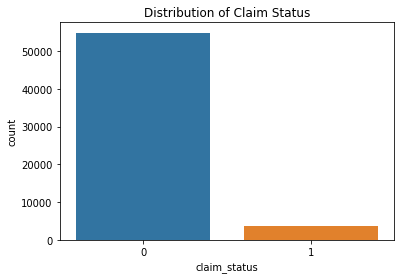

<Figure size 576x360 with 0 Axes>

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data= df, x='claim_status')
plt.title('Distribution of Claim Status')
plt.figure(figsize=(8,5))

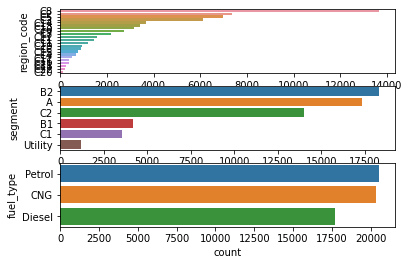

In [8]:
#selecting some relevant categorical columns for analysis
categorical_columns = ['region_code', 'segment', 'fuel_type']

for i ,column in enumerate(categorical_columns,1) :
    plt.subplot(3,1,i)
    sns.countplot(data=df, y= column , order = df[column].value_counts().index)
plt.show()

Handling Class Imbalance

In [9]:
from sklearn.utils import resample

#separate majority and minority classes
majority = df[df['claim_status'] == 0]
minority = df[df['claim_status'] == 1]

#oversample the minority class
minority_oversampled = resample (minority,replace=True,n_samples= len(majority),random_state=42)

#combine majority class with oversampled minority class
oversampled_data = pd.concat([majority,minority_oversampled])

oversampled_distribution = oversampled_data.claim_status.value_counts()
oversampled_distribution


0    54844
1    54844
Name: claim_status, dtype: int64

Feature Selection

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_data = df.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)


In [11]:
X = encoded_data.drop(['claim_status'], axis =1)
y = encoded_data ['claim_status']

In [12]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X,y)

RandomForestClassifier(random_state=42)

In [13]:
feature_importance = rf_model.feature_importances_

#create a dataframe for visualization of feature importance
features_df = pd.DataFrame ({'Feature' : X.columns , 'Importance' : feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

features_df

,Feature,Importance
0,policy_id,0.321072
1,subscription_length,0.248309
3,customer_age,0.176639
2,vehicle_age,0.135190
5,region_density,0.053838
4,region_code,0.052649
7,model,0.000957
24,length,0.000846
26,gross_weight,0.000834
11,engine_type,0.000791


Model Training

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

#drop 'Policy_id' column from the data
oversampled_data = oversampled_data.drop('policy_id', axis=1)

#prepare the oversampled data
X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

#encoding categorical columns
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)

#create and train the Random Forest model
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

#predictions
y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



In [16]:
original_encoded = df.drop('policy_id', axis=1).copy()
encoders = {col: LabelEncoder().fit(X_oversampled[col]) for col in X_oversampled.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

print(comparison_df.head())

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          1
4       0          0
